There are 14 features in the dataset, which are described below.

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment

Value 0: upsloping

Value 1: flat

Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: Thalessemia

0 = normal

1 = fixed defect

2 = reversable defect

condition: 

0 = no disease, 1 = disease

In [1]:
## Importanting the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [4]:
# ignore warning
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
## Importing the Dataset
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

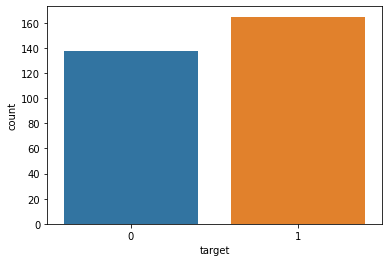

In [8]:
import seaborn as sns
sns.countplot(x='target', data=data)
plt.show()

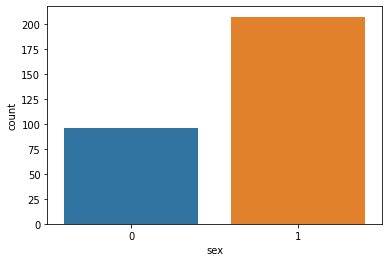

In [9]:
import seaborn as sns
sns.countplot(x='sex', data=data)
plt.show()

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
# Let's check if there is any Null value using isnull() method
data.isnull().values.any()

False

In [13]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

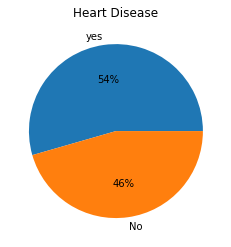

In [14]:

# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = data['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

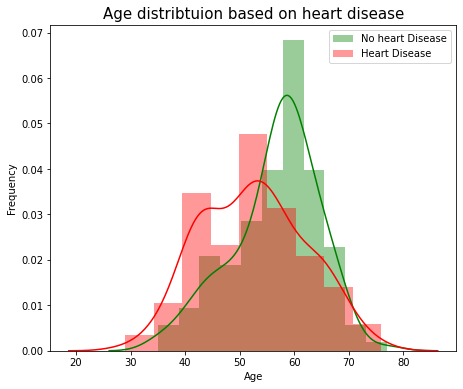

In [15]:

fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(data[data['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(data[data['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()

In [16]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(data[data['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(data[data['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', data[data['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.60144927536232


In [17]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(data[data['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(data[data['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', data[data['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.4969696969697


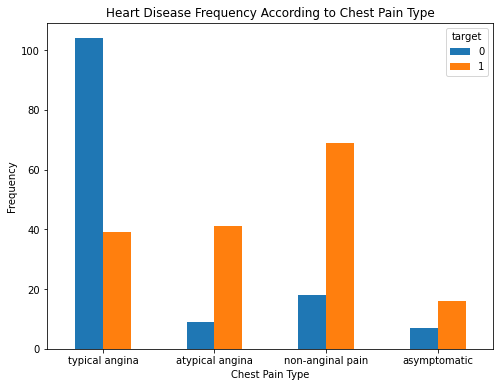

In [18]:

pd.crosstab(data.cp,data.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

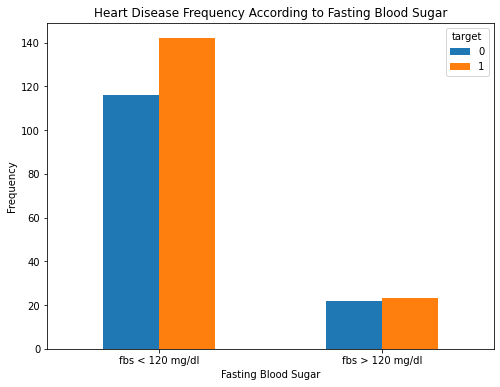

In [19]:
pd.crosstab(data.fbs,data.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [20]:
#Outlier detection

In [21]:
import seaborn as sns

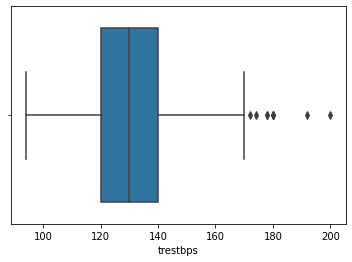

In [22]:
sns.boxplot(data['trestbps'])

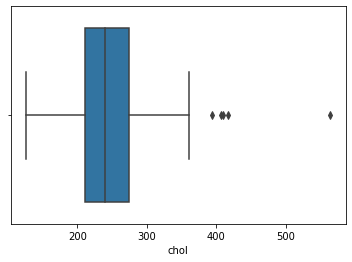

In [23]:
sns.boxplot(data['chol'])

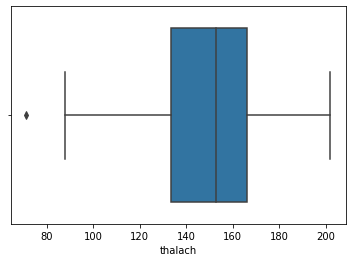

In [24]:
sns.boxplot(data['thalach'])

In [25]:
#Finding the IQR
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [26]:
# The code will give information where False means values are valid whereas True indicates presence of an outlier.

print(data < (Q1 - (1.5 * IQR)) |(data > (Q3 + 1.5 * IQR)))

       age    sex     cp  trestbps   chol  ...  oldpeak  slope     ca   thal  target
0    False  False  False     False  False  ...    False   True   True  False   False
1    False  False  False     False  False  ...    False   True   True  False   False
2    False   True  False     False  False  ...    False  False   True  False   False
3    False  False  False     False  False  ...     True  False   True  False   False
4    False   True   True     False  False  ...     True  False   True  False   False
..     ...    ...    ...       ...    ...  ...      ...    ...    ...    ...     ...
298  False   True   True     False  False  ...     True  False   True  False    True
299  False  False  False     False  False  ...    False  False   True  False    True
300  False  False   True     False  False  ...    False  False  False  False    True
301  False  False   True     False  False  ...    False  False  False  False    True
302  False   True  False     False  False  ...     True  False  F

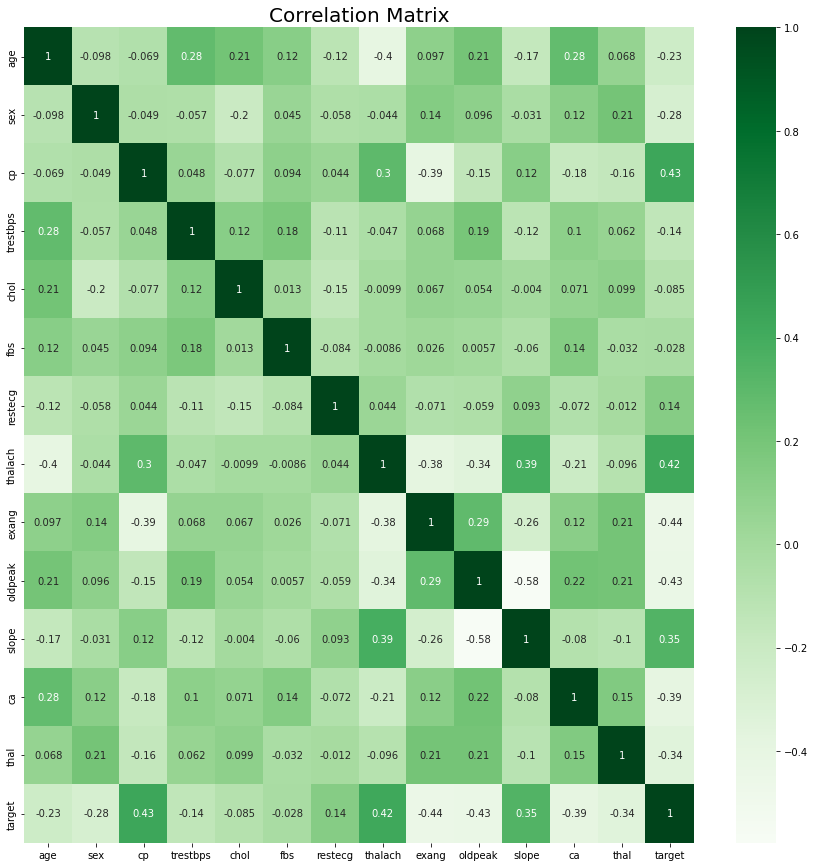

In [27]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(data.corr(), annot = True, cmap = "Greens")
plt.show()

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly. We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).



In [28]:
#fixing our data in x and y. Here y contains target data and X contains rest all the features.
x= data.drop(columns= 'target')
y= data.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (227, 13), X_test size: (76, 13)


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.transform(x_test)

In [31]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBOOST":XGBClassifier()
}

In [32]:
for key,classifier in classifiers.items():
  classifier.fit(x_train_scaler,y_train)
  training_score=cross_val_score(classifier,x_train,y_train,cv=10)
  print("Classfiers:",classifier.__class__.__name__,"has a training score ",round(training_score.mean(),2)*100)

Classfiers: LogisticRegression has a training score  82.0
Classfiers: KNeighborsClassifier has a training score  63.0
Classfiers: SVC has a training score  65.0
Classfiers: DecisionTreeClassifier has a training score  73.0
Classfiers: RandomForestClassifier has a training score  83.0
Classfiers: XGBClassifier has a training score  82.0


In [33]:
#creating Logistic Regression Model
LR_model= LogisticRegression(penalty='l2', C=1.0,solver='newton-cg')
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

0.881578947368421

In [34]:

print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

cm = confusion_matrix(y_test, y_pred_LR)
print(cm)

#Creating a pickle file for the classifier
filename = 'heart-disease-prediction-model.pkl'
pickle.dump(LR_model, open(filename, 'wb'))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

Accuracy: 88.16%

[[30  5]
 [ 4 37]]
